**Binary Prediction of Poisonous Mushrooms**


Your Goal: The goal of this competition is to predict whether a mushroom is edible or poisonous based on its physical characteristics.

In [1]:
# id: A unique identifier for each mushroom sample.
# class: The target variable indicating whether the mushroom is edible (e) or poisonous (p).
# cap-diameter: Numerical feature representing the diameter of the mushroom cap.
# cap-shape: Categorical feature describing the shape of the mushroom cap.
# cap-surface: Categorical feature describing the surface texture of the mushroom cap.
# cap-color: Categorical feature describing the color of the mushroom cap.
# does-bruise-or-bleed: Categorical feature indicating whether the mushroom bruises or bleeds when handled.
# gill-attachment: Categorical feature describing how the gills are attached to the mushroom stem.
# gill-spacing: Categorical feature describing the spacing of the gills.
# gill-color: Categorical feature describing the color of the gills.
# stem-height: Numerical feature representing the height of the mushroom stem.
# stem-width: Numerical feature representing the width of the mushroom stem.
# stem-root: Categorical feature describing the root type of the stem.
# stem-surface: Categorical feature describing the surface texture of the stem.
# stem-color: Categorical feature describing the color of the stem.
# veil-type: Categorical feature describing the type of veil covering the mushroom.
# veil-color: Categorical feature describing the color of the veil.
# has-ring: Categorical feature indicating whether the mushroom has a ring on the stem.
# ring-type: Categorical feature describing the type of ring on the stem.
# spore-print-color: Categorical feature describing the color of the spore print.
# habitat: Categorical feature describing the type of environment where the mushroom is typically found.
# season: Categorical feature indicating the season during which the mushroom is found.

Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier,StackingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,matthews_corrcoef
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


**Understanding the Data**


In [3]:
sam_data = pd.read_csv('sample_submission.csv')
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

In [4]:
sam_data.head()

,id,class
0,3116945,e
1,3116946,e
2,3116947,e
3,3116948,e
4,3116949,e


In [5]:
test_data.head()

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,3116945,8.64,x,NaN,n,t,NaN,NaN,w,11.13,...,b,NaN,w,u,w,t,g,NaN,d,a
1,3116946,6.90,o,t,o,f,NaN,c,y,1.27,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
2,3116947,2.00,b,g,n,f,NaN,c,n,6.18,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3,3116948,3.47,x,t,n,f,s,c,n,4.98,...,NaN,NaN,w,NaN,n,t,z,NaN,d,u
4,3116949,6.17,x,h,y,f,p,NaN,y,6.73,...,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u


In [6]:
test_data.shape

(2077964, 21)

In [7]:
train_data.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [8]:
train_data.shape

(3116945, 22)

**Exploratory Data Analysis (EDA)**


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

In [10]:
# chech duplicate value
train_data.duplicated().sum()

0

In [11]:
# drop duplicate values
train_data.drop_duplicates(inplace=True)


In [12]:
# check null values
train_data.isnull().sum()

id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

In [13]:
test_data.isnull().sum()

id                            0
cap-diameter                  7
cap-shape                    31
cap-surface              446904
cap-color                    13
does-bruise-or-bleed         10
gill-attachment          349821
gill-spacing             839595
gill-color                   49
stem-height                   1
stem-width                    0
stem-root               1838012
stem-surface            1321488
stem-color                   21
veil-type               1971545
veil-color              1826124
has-ring                     19
ring-type                 86195
spore-print-color       1899617
habitat                      25
season                        0
dtype: int64

In [14]:
# Check the missing values again if needed
missing_values = train_data.isnull().sum()
missing_percentage = (missing_values / len(train_data)) * 100
print("Missing values:\n", missing_percentage)

Missing values:
 id                       0.000000
class                    0.000000
cap-diameter             0.000128
cap-shape                0.001283
cap-surface             21.528227
cap-color                0.000385
does-bruise-or-bleed     0.000257
gill-attachment         16.809280
gill-spacing            40.373988
gill-color               0.001829
stem-height              0.000000
stem-width               0.000000
stem-root               88.452732
stem-surface            63.551362
stem-color               0.001219
veil-type               94.884350
veil-color              87.936970
has-ring                 0.000770
ring-type                4.134818
spore-print-color       91.425482
habitat                  0.001444
season                   0.000000
dtype: float64


In [15]:
# Check the missing values again if needed
missing_values = test_data.isnull().sum()
missing_percentage = (missing_values / len(test_data)) * 100
print("Missing values:\n", missing_percentage)

Missing values:
 id                       0.000000
cap-diameter             0.000337
cap-shape                0.001492
cap-surface             21.506821
cap-color                0.000626
does-bruise-or-bleed     0.000481
gill-attachment         16.834796
gill-spacing            40.404694
gill-color               0.002358
stem-height              0.000048
stem-width               0.000000
stem-root               88.452543
stem-surface            63.595327
stem-color               0.001011
veil-type               94.878689
veil-color              87.880445
has-ring                 0.000914
ring-type                4.148051
spore-print-color       91.417224
habitat                  0.001203
season                   0.000000
dtype: float64


  handling missing values

In [16]:
# Drop columns with more than 50% missing values
cols_to_drop = missing_percentage[missing_percentage > 50].index
train_data.drop(columns=cols_to_drop, inplace=True)
test_data.drop(columns=cols_to_drop, inplace=True)

In [17]:
# Impute for numerical columns using median
# train_data
numerical_cols = train_data.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    train_data[col].fillna(train_data[col].median(), inplace=True)

# test_data
numerical_cols = test_data.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    test_data[col].fillna(test_data[col].median(), inplace=True)

#  Impute for categorical columns using mode
#train_data
categorical_cols = train_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)

#test-data
categorical_cols = test_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    test_data[col].fillna(test_data[col].mode()[0], inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_11036\690755808.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(train_data[col].median(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11036\690755808.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [18]:
# again check null values in train data
print("Missing values after handling:\n", train_data.isnull().sum())

Missing values after handling:
 id                      0
class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64


In [19]:
# again chech null values test data
print("Missing values after handling:\n", test_data.isnull().sum())

Missing values after handling:
 id                      0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64


In [20]:
train_data.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,4.51,15.39,w,f,f,d,a
1,1,p,4.51,x,h,o,f,a,c,n,4.79,6.48,o,t,z,d,w
2,2,e,6.94,f,s,b,f,x,c,w,6.85,9.93,n,f,f,l,w
3,3,e,3.88,f,y,g,f,s,c,g,4.16,6.53,w,f,f,d,u
4,4,e,5.85,x,l,w,f,d,c,w,3.37,8.36,w,f,f,g,a


In [21]:
train_data.shape

(3116945, 17)

In [22]:
test_data.shape

(2077964, 16)

In [23]:
train_data.describe()

,id,cap-diameter,stem-height,stem-width
count,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06
mean,1.558472e+06,6.309848e+00,6.348333e+00,1.115379e+01
std,8.997847e+05,4.657928e+00,2.699755e+00,8.095477e+00
min,0.000000e+00,3.000000e-02,0.000000e+00,0.000000e+00
25%,7.792360e+05,3.320000e+00,4.670000e+00,4.970000e+00
50%,1.558472e+06,5.750000e+00,5.880000e+00,9.650000e+00
75%,2.337708e+06,8.240000e+00,7.410000e+00,1.563000e+01
max,3.116944e+06,8.067000e+01,8.872000e+01,1.029000e+02


In [24]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 17 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-color            object 
 13  has-ring              object 
 14  ring-type             object 
 15  habitat               object 
 16  season                object 
dtypes: float64(3), int64(1), object(13)
memory usage: 404.3+ MB


In [25]:
# Identify numerical and categorical columns
# train_data
numerical_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = train_data.select_dtypes(include=['object']).columns

print(numerical_cols)
print(categorical_cols)

Index(['id', 'cap-diameter', 'stem-height', 'stem-width'], dtype='object')
Index(['class', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-color', 'has-ring', 'ring-type', 'habitat', 'season'],
      dtype='object')


In [26]:
# Identify numerical and categorical columns
# test_data
test_numerical_cols = test_data.select_dtypes(include=['float64', 'int64']).columns
test_categorical_cols = test_data.select_dtypes(include=['object']).columns

print(test_numerical_cols)
print(test_categorical_cols)

Index(['id', 'cap-diameter', 'stem-height', 'stem-width'], dtype='object')
Index(['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
       'gill-attachment', 'gill-spacing', 'gill-color', 'stem-color',
       'has-ring', 'ring-type', 'habitat', 'season'],
      dtype='object')


In [27]:
# numeric data
print(train_data[numerical_cols].shape)
train_data[numerical_cols].head()


(3116945, 4)


,id,cap-diameter,stem-height,stem-width
0,0,8.80,4.51,15.39
1,1,4.51,4.79,6.48
2,2,6.94,6.85,9.93
3,3,3.88,4.16,6.53
4,4,5.85,3.37,8.36


In [28]:
# categorical data
print(train_data[categorical_cols].shape)
train_data[categorical_cols].head()

(3116945, 13)


,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-color,has-ring,ring-type,habitat,season
0,e,f,s,u,f,a,c,w,w,f,f,d,a
1,p,x,h,o,f,a,c,n,o,t,z,d,w
2,e,f,s,b,f,x,c,w,n,f,f,l,w
3,e,f,y,g,f,s,c,g,w,f,f,d,u
4,e,x,l,w,f,d,c,w,w,f,f,g,a


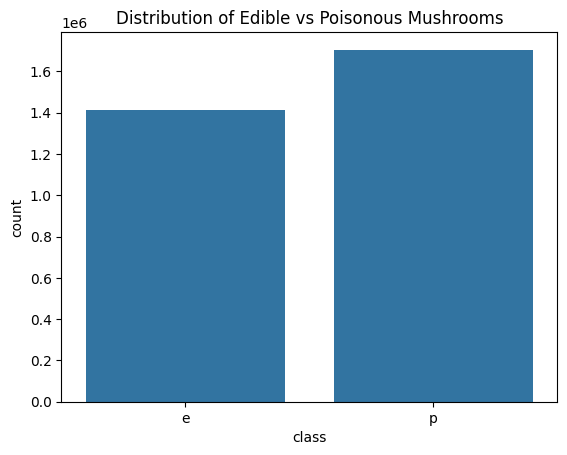

In [29]:
# Visualizing the distribution of the target variable
sns.countplot(x='class', data=train_data)
plt.title('Distribution of Edible vs Poisonous Mushrooms')
plt.show()

In [30]:
# # Plotting the histograms with KDE for each numerical feature

# plt.figure(figsize=(16, 12))
# for i, col in enumerate(numerical_cols):
#     plt.subplot(len(numerical_cols) // 2 + 1, 2, i + 1)  
#     sns.histplot(train_data[col], kde=True, bins=30)
#     plt.title(f'{col} Distribution')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')

# plt.tight_layout()
# plt.show()

In [31]:
# # check outlier in numeric data 
# # box plot
# plt.figure(figsize=(16, 12))
# for i, col in enumerate(numerical_cols):
#     plt.subplot(3, 3, i + 1)  
#     sns.boxplot(y=train_data[col])  
#     plt.title(f'{col} Box Plot')
#     plt.ylabel(col)

# plt.tight_layout()
# plt.show()

handling outlier 

In [32]:
# cap_outlier
def cap_outliers(df):
    df_capped = df.copy()
    for column in df.select_dtypes(include='number').columns:
        Q1 = df_capped[column].quantile(0.25)
        Q3 = df_capped[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_capped[column] = df_capped[column].clip(lower=lower_bound, upper=upper_bound)

    return df_capped

In [33]:
# handle outlier using mean
import numpy as np

def handle_outliers_mean(df):
    df_mean_handled = df.copy()
    
    for column in df.select_dtypes(include='number').columns:
        Q1 = df_mean_handled[column].quantile(0.25)
        Q3 = df_mean_handled[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        mean_value = df_mean_handled[column][(df_mean_handled[column] >= lower_bound) & 
                                             (df_mean_handled[column] <= upper_bound)].mean()
        df_mean_handled[column] = np.where(
            (df_mean_handled[column] < lower_bound) | (df_mean_handled[column] > upper_bound),
            mean_value,
            df_mean_handled[column]
        )

    return df_mean_handled

df_mean_handled = handle_outliers_mean(train_data[numerical_cols])


In [34]:
# handle outlier using log_tranform
import numpy as np

def log_transform(df):
    df_log_transformed = df.copy()
    
    for column in df_log_transformed.select_dtypes(include='number').columns:
        df_log_transformed[column] = np.log1p(df_log_transformed[column])

    return df_log_transformed

df_log_transformed = log_transform(train_data[numerical_cols])


In [35]:
# you can choose any of them for handle outlier

# method-1. cap_outlier 
# method-2. handle outlier using mean,median
# method-3. handle outlier using log_tranform


In [36]:
# cap outlier
train_data[numerical_cols] = cap_outliers(train_data[numerical_cols])


In [37]:
# #  after handle outlier Plotting the histograms with KDE for each numerical feature

# plt.figure(figsize=(16, 12))
# for i, col in enumerate(numerical_cols):
#     plt.subplot(len(numerical_cols) // 2 + 1, 2, i + 1)  
#     sns.histplot(train_data[col], kde=True, bins=30)
#     plt.title(f'{col} Distribution')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')

# plt.tight_layout()
# plt.show()

In [38]:
# # box plot
# plt.figure(figsize=(16, 12))
# for i, col in enumerate(numerical_cols):
#     plt.subplot(3, 3, i + 1)  
#     sns.boxplot(y=train_data[col]) 
#     plt.title(f'{col} Box Plot')
#     plt.ylabel(col)

# plt.tight_layout()
# plt.show()

2.3  Preprocessing categorical columns



In [39]:
# plt.figure(figsize=(25, 25))

# for i, feature in enumerate(categorical_cols):
#     plt.subplot((len(categorical_cols) + 1) // 2, 2, i + 1)  
#     sns.countplot(data=train_data, x=feature)  
#     plt.title(f'Distribution of {feature} by Class')
#     plt.xlabel(feature)
#     plt.ylabel('Count')

# plt.tight_layout()
# plt.show()


In [40]:
print(train_data[categorical_cols].dtypes)


class                   object
cap-shape               object
cap-surface             object
cap-color               object
does-bruise-or-bleed    object
gill-attachment         object
gill-spacing            object
gill-color              object
stem-color              object
has-ring                object
ring-type               object
habitat                 object
season                  object
dtype: object


In [41]:
train_data['gill-attachment'].value_counts()

gill-attachment
a        1169970
d         589236
x         360878
e         301858
s         295439
          ...   
1              1
is a           1
3.71           1
50.44          1
13.94          1
Name: count, Length: 78, dtype: int64

In [42]:
train_data[categorical_cols].nunique()

class                    2
cap-shape               74
cap-surface             83
cap-color               78
does-bruise-or-bleed    26
gill-attachment         78
gill-spacing            48
gill-color              63
stem-color              59
has-ring                23
ring-type               40
habitat                 52
season                   4
dtype: int64

# in categorical features have mix data numeric and text so i consider only text data
# choose only alphabet & remove numeric data in categorical column


In [43]:
# train_data
def filter_alphabetic(categorical_cols):
    return categorical_cols[categorical_cols.str.isalpha()]

train_data[categorical_cols] = train_data[categorical_cols].apply(filter_alphabetic)



In [44]:
for column in categorical_cols:
    print(f"Column: {column}")
    print(train_data[column].value_counts())
    print("\n")


Column: class
class
p    1705396
e    1411549
Name: count, dtype: int64


Column: cap-shape
cap-shape
x    1436066
f     676238
s     365146
b     318646
o     108835
p     106967
c     104520
d         65
e         60
n         41
t         36
w         36
g         34
y         33
r         32
a         30
u         27
z         22
l         21
i         14
k         13
h          6
m          2
Name: count, dtype: int64


Column: cap-surface
cap-surface
t         1131800
s          384970
y          327826
h          284460
g          263729
d          206832
k          128875
e          119712
i          113440
w          109840
l           44859
n              96
f              75
p              59
u              49
a              44
m              42
o              39
r              35
x              33
c              31
b              18
z               8
season          7
class           2
Name: count, dtype: int64


Column: cap-color
cap-color
n         1359554
y          3866

In [45]:
# test_data
def filter_alphabetic(test_categorical_cols):
    return test_categorical_cols[test_categorical_cols.str.isalpha()]

test_data[test_categorical_cols] = test_data[test_categorical_cols].apply(filter_alphabetic)



In [46]:
for column in test_categorical_cols:
    print(f"Column: {column}")
    print(test_data[column].value_counts())
    print("\n")


Column: cap-shape
cap-shape
x    957980
f    452360
s    242698
b    211879
o     71972
p     71302
c     69436
e        33
d        30
t        28
w        27
n        27
a        24
y        24
u        18
g        17
k        17
l        17
r        16
z         8
i         4
m         4
h         3
Name: count, dtype: int64


Column: cap-surface
cap-surface
t          753756
s          257190
y          218336
h          189737
g          176140
d          137675
k           86041
e           79918
i           75570
w           73109
l           30101
f              54
n              50
p              44
o              37
a              28
x              27
m              25
r              25
u              21
c              19
b              14
z               6
season          3
class           1
habitat         1
Name: count, dtype: int64


Column: cap-color
cap-color
n          904320
y          259062
w          253844
g          140681
e          131524
o          119764
p   

In [47]:
train_data[categorical_cols].nunique()

class                    2
cap-shape               23
cap-surface             25
cap-color               25
does-bruise-or-bleed    22
gill-attachment         25
gill-spacing            20
gill-color              27
stem-color              24
has-ring                21
ring-type               26
habitat                 25
season                   4
dtype: int64

In [48]:
# plt.figure(figsize=(25, 25))

# for i, feature in enumerate(categorical_cols):
#     plt.subplot((len(categorical_cols) + 1) // 2, 2, i + 1) 
#     sns.countplot(data=train_data, x=feature) 
#     plt.title(f'Distribution of {feature} by Class')
#     plt.xlabel(feature)
#     plt.ylabel('Count')

# plt.tight_layout()
# plt.show()


In [49]:
# # correlation with class and categorical feature

# plt.figure(figsize=(25, 25))

# for i, feature in enumerate(categorical_cols):
#     plt.subplot((len(categorical_cols) + 1) // 2, 2, i + 1)  
#     sns.countplot(data=train_data, x=feature, hue='class') 
#     plt.title(f'Distribution of {feature} by Class')
#     plt.xlabel(feature)
#     plt.ylabel('Count')

# plt.tight_layout()
# plt.show()


**Feature Engineering**


In [50]:
numerical_columns = ['cap-diameter', 'stem-height', 'stem-width']

categorical_columns = ['cap-shape', 'cap-surface', 'cap-color','does-bruise-or-bleed', 'gill-attachment'
                      ,'gill-spacing','gill-color','stem-color','has-ring','ring-type','habitat','season'] 

In [51]:
scaler = StandardScaler()


In [52]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [53]:
ohe = OneHotEncoder(drop='first', sparse_output=False,handle_unknown='ignore')  



In [54]:
# ColumnTransformer to apply the transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numerical_columns),
        ('cat', ohe, categorical_columns)
    ]
)

In [55]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression


In [68]:
# model_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', LogisticRegression(penalty='l2'))
# ])

In [57]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=10)), 
    ('classifier', RandomForestClassifier(n_estimators=20, random_state=42))
])

In [58]:
# model_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', RandomForestClassifier(n_estimators=20, random_state=42))
# ])

stacking algotithm

In [59]:
# it will take more time to train model ,
# for run this code require GPU

base_models = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),  # Reduced n_estimators
    ('gb', GradientBoostingClassifier(n_estimators=10, random_state=42)),  # Reduced n_estimators
    ('svm', SVC(probability=True, kernel='linear', random_state=42)),  # Linear kernel for efficiency
    ('knn', KNeighborsClassifier(n_neighbors=3))  # Reduced neighbors
]

# Meta model
meta_model = LogisticRegression()

# Stacking model
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1
)

# Build the pipeline (staking)
stack_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('stacking', stacking_model)
])

In [60]:
from sklearn.ensemble import VotingClassifier

# VotingClassifier instead of StackingClassifier
voting_model = VotingClassifier(
    estimators=base_models,
    voting='soft',  # Soft voting for probabilities
    n_jobs=-1
)

# Pipeline
voting_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('voting', voting_model)
])


In [69]:
# prepare the data
X = train_data.drop(['class'], axis=1)
y = train_data['class']

In [70]:
# Encode the target variable
Label_encodeing = LabelEncoder()
y = Label_encodeing.fit_transform(y)


In [71]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [72]:
X_train.head()

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
1252551,1252551,2.58,s,w,n,t,d,c,n,2.87,5.69,n,f,f,d,a
1799166,1799166,1.83,b,g,o,f,a,c,n,5.36,2.70,n,f,f,m,a
1936146,1936146,5.22,x,i,o,f,e,c,y,7.32,7.41,k,f,f,m,a
1464811,1464811,4.52,f,t,y,f,s,d,y,5.85,12.74,y,f,f,d,a
767639,767639,6.18,f,t,n,f,d,c,y,6.33,10.29,n,f,f,l,w


In [65]:
# stack_model_pipeline.fit(X_train,y_train)

In [66]:
# voting_model_pipeline.fit(X_train, y_train)

In [73]:
# # train the model
model_pipeline.fit(X_train, y_train)


MemoryError: Unable to allocate 4.90 GiB for an array with shape (2493556, 264) and data type float64

In [ ]:
# pip install lightgbm


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# import lightgbm as lgb
# from sklearn.pipeline import Pipeline

# # LightGBM Model
# lgb_model = lgb.LGBMClassifier(
#     n_estimators=100,
#     random_state=42
# )

# # Pipeline
# lgb_model_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', lgb_model)
# ])

# # Fit the model
# lgb_model_pipeline.fit(X_train, y_train)


In [ ]:
model_pipeline.score(X_train,y_train)

0.9992231977144287

In [ ]:
model_pipeline.score(X_test,y_test)

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [4, 5, 8, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.9856975339635444

In [ ]:
y_pred = model_pipeline.predict(X_test)


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [4, 5, 8, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
y_pred = model_pipeline.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [4, 5, 8, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Accuracy: 0.9857
              precision    recall  f1-score   support

           0       0.98      0.99      0.98    282397
           1       0.99      0.99      0.99    340992

    accuracy                           0.99    623389
   macro avg       0.99      0.99      0.99    623389
weighted avg       0.99      0.99      0.99    623389



**Evaluate the model using MCC**


In [ ]:
# the MCC score can help determine how well your model is classifying the mushrooms as either edible or poisonous. 
# Given that MCC accounts for all four confusion matrix categories,it provides a more comprehensive measure than accuracy, especially for imbalanced datasets.

Matthews Correlation Coefficient (MCC): 0.9805


In [ ]:
mcc_score = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc_score:.4f}")


Matthews Correlation Coefficient (MCC): 0.9712


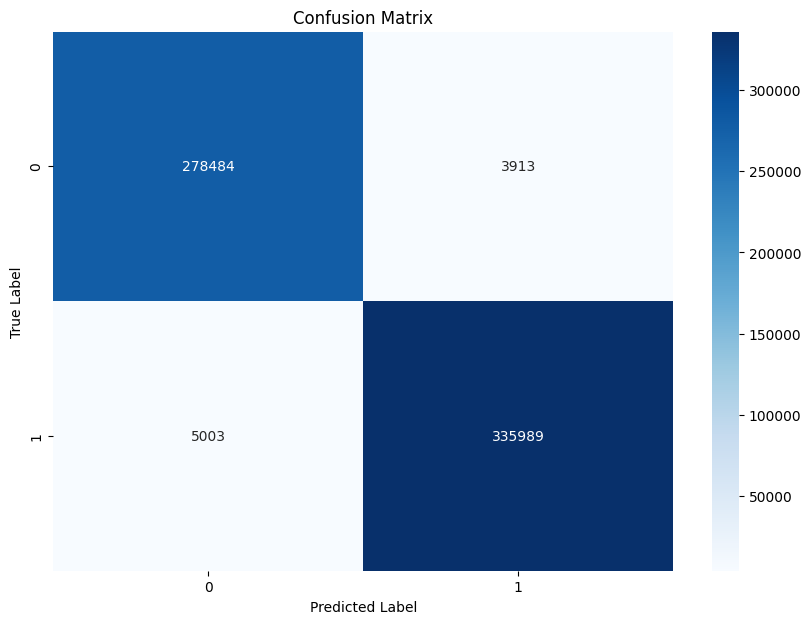

In [ ]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

plot_confusion_matrix(y_test, y_pred)


**Predict Test_dataframe**

In [ ]:
test_predictions = model_pipeline.predict(test_data)


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [1, 2, 3, 4, 5, 7, 8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
test_predictions

array([0, 1, 1, ..., 1, 0, 0])

In [ ]:
test_predictions_class = Label_encodeing.inverse_transform(test_predictions)


In [ ]:
test_predictions_class

array(['e', 'p', 'p', ..., 'p', 'e', 'e'], dtype=object)

**Final Submission File**

In [ ]:
# Create a DataFrame for submission
sam_data['class'] = test_predictions_class


In [ ]:
sam_data.head()

,id,class
0,3116945,e
1,3116946,p
2,3116947,p
3,3116948,p
4,3116949,e


In [ ]:
# Save the submission file
sam_data.to_csv('submission_new.csv', index=False)


In [ ]:
submission = pd.read_csv('submission_new.csv')
submission.head()

,id,class
0,3116945,e
1,3116946,p
2,3116947,p
3,3116948,p
4,3116949,e


In [ ]:
submission.shape

(2077964, 2)

**prediction system**

In [ ]:
train_data.iloc[200]

id                        200
class                       p
cap-diameter             7.95
cap-shape                   x
cap-surface                 h
cap-color                   e
does-bruise-or-bleed        f
gill-attachment             x
gill-spacing                d
gill-color                  w
stem-height              5.97
stem-width              17.52
stem-color                  w
has-ring                    f
ring-type                   f
habitat                     d
season                      a
Name: 200, dtype: object

In [ ]:
import pandas as pd

def predict_mushroom_class_with_input(model_pipeline):
    manual_input = {
        'cap-diameter': float(input("Enter cap diameter (e.g., 5.0): ")),
        'cap-shape': input("Enter cap shape (e.g., x): "),
        'cap-surface': input("Enter cap surface (e.g., s): "),
        'cap-color': input("Enter cap color (e.g., n): "),
        'does-bruise-or-bleed': input("Does it bruise or bleed? (t/f): "),
        'gill-attachment': input("Enter gill attachment (e.g., f): "),
        'gill-spacing': input("Enter gill spacing (e.g., c): "),
        'gill-color': input("Enter gill color (e.g., k): "),
        'stem-height': float(input("Enter stem height (e.g., 6.0): ")),
        'stem-width': float(input("Enter stem width (e.g., 1.0): ")),
        'stem-color': input("Enter stem color (e.g., e): "),
        'has-ring': input("Does it have a ring? (t/f): "),
        'ring-type': input("Enter ring type (e.g., p): "),
        'habitat': input("Enter habitat (e.g., d): "),
        'season': input("Enter season (e.g., s): ")
    }

    input_data = pd.DataFrame([manual_input])

    prediction = model_pipeline.predict(input_data)

    predicted_class = 'e' if prediction[0] == 0 else 'p'
    return predicted_class




In [ ]:
predicted_class = predict_mushroom_class_with_input(model_pipeline)
print(f"The predicted class is: {predicted_class}")

ValueError: could not convert string to float: '.l.'